In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Loading the Dataset
df = pd.read_csv("encounters.csv")
df.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia


### Checking and Understanding the Data

In [26]:
# Checking the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   27891 non-null  object 
 1   START                27891 non-null  object 
 2   STOP                 27891 non-null  object 
 3   PATIENT              27891 non-null  object 
 4   ORGANIZATION         27891 non-null  object 
 5   PAYER                27891 non-null  object 
 6   ENCOUNTERCLASS       27891 non-null  object 
 7   CODE                 27891 non-null  int64  
 8   DESCRIPTION          27891 non-null  object 
 9   BASE_ENCOUNTER_COST  27891 non-null  float64
 10  TOTAL_CLAIM_COST     27891 non-null  float64
 11  PAYER_COVERAGE       27891 non-null  float64
 12  REASONCODE           8350 non-null   float64
 13  REASONDESCRIPTION    8350 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 3.0+ MB


In [27]:
# Checking for missing values
df.isnull().sum()

Id                         0
START                      0
STOP                       0
PATIENT                    0
ORGANIZATION               0
PAYER                      0
ENCOUNTERCLASS             0
CODE                       0
DESCRIPTION                0
BASE_ENCOUNTER_COST        0
TOTAL_CLAIM_COST           0
PAYER_COVERAGE             0
REASONCODE             19541
REASONDESCRIPTION      19541
dtype: int64

In [28]:
# Viewing basic statistics for numerical columns
df.describe()

,CODE,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE
count,2.789100e+04,27891.000000,27891.000000,27891.000000,8.350000e+03
mean,2.972670e+08,116.181614,3639.682174,1114.965652,4.751643e+11
std,2.017839e+08,28.410082,9205.595748,4768.615576,5.874089e+12
min,1.505002e+06,85.550000,0.000000,0.000000,5.602001e+06
25%,1.853450e+08,85.550000,142.580000,0.000000,5.582200e+07
50%,1.853490e+08,136.800000,278.580000,28.440000,8.880501e+07
75%,4.244410e+08,142.580000,1412.530000,155.770000,1.956620e+08
max,7.029270e+08,146.180000,641882.700000,247751.420000,1.241710e+14


### Data Cleaning

In [29]:
# Converting START and STOP to datetime
df["START"] = pd.to_datetime(df["START"])
df["STOP"] = pd.to_datetime(df["STOP"])

In [30]:
# Creating a new column: duration in minutes
df["DURATION_MIN"] = (df["STOP"] - df["START"]).dt.total_seconds() / 60

In [31]:
# Dropping irrelevant columns
cols_to_drop = ["Id", "PATIENT", "ORGANIZATION", "PAYER", "START", "STOP"]
df.drop(columns=cols_to_drop, inplace = True)

In [32]:
# Filling mising values
df["REASONDESCRIPTION"].fillna("Unknown", inplace = True)
df["REASONCODE"].fillna(0, inplace = True) 

### Encoding Categorical Variables

In [33]:
# Initializing label encoder
le = LabelEncoder()

In [34]:
# Encoding categorical features
df["DESCRIPTION"] = le.fit_transform(df["DESCRIPTION"])
df["REASONDESCRIPTION"] =le.fit_transform(df["REASONDESCRIPTION"])

In [35]:
# Encoding the target variable
df["ENCOUNTERCLASS"] = le.fit_transform(df["ENCOUNTERCLASS"])

### Splitting the Data for Training and Testing

In [36]:
# Splitting features and target
X = df.drop("ENCOUNTERCLASS", axis = 1)
y = df["ENCOUNTERCLASS"]

In [37]:
# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = 0.2, random_state = 42)

In [38]:
# Confirming the shapes
"X_train shape:", X_train.shape
"X_test shape:", X_test.shape
"y_train shape:", y_train.shape
"y_test shape:", y_test.shape

('y_test shape:', (5579,))

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["REASONDESCRIPTION"] = le.fit_transform(df["REASONDESCRIPTION"])

In [40]:
df.dtypes

ENCOUNTERCLASS           int64
CODE                     int64
DESCRIPTION              int64
BASE_ENCOUNTER_COST    float64
TOTAL_CLAIM_COST       float64
PAYER_COVERAGE         float64
REASONCODE             float64
REASONDESCRIPTION        int64
DURATION_MIN           float64
dtype: object

In [41]:
# Converting REASONCODE to numeric if it's not already
df["REASONCODE"] = pd.to_numeric(df["REASONCODE"], errors = "coerce").fillna(0)

In [42]:
# Defining features and target again
X = df.drop("ENCOUNTERCLASS", axis = 1)
y = df["ENCOUNTERCLASS"]

# Train-testing split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [43]:
# Initializing scaler
scaler = StandardScaler()

# Fitting and transforming only the numeric columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the Random Forest Model

In [44]:
# Initializing the model
clf = RandomForestClassifier(random_state = 42)

# Training the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluating the Model

In [45]:
# Predicting on the test data
y_pred = clf.predict(X_test)

# Accuracy score
"Accuracy:", accuracy_score(y_test, y_pred)

# Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      2473\n           1       1.00      1.00      1.00       488\n           2       1.00      1.00      1.00       211\n           3       1.00      1.00      1.00      1296\n           4       1.00      1.00      1.00       725\n           5       1.00      1.00      1.00       386\n\n    accuracy                           1.00      5579\n   macro avg       1.00      1.00      1.00      5579\nweighted avg       1.00      1.00      1.00      5579\n'

##### Checking for Data Leakage

In [46]:
"Feature columns:"
X.columns.tolist()

['CODE',
 'DESCRIPTION',
 'BASE_ENCOUNTER_COST',
 'TOTAL_CLAIM_COST',
 'PAYER_COVERAGE',
 'REASONCODE',
 'REASONDESCRIPTION',
 'DURATION_MIN']

### Visualizating the Results

#### a) Confusion Matrix

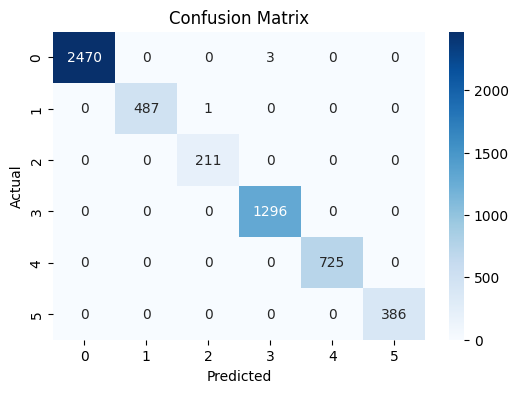

In [47]:
plt.figure(figsize = (6, 4))
sn.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### b) Feature Importance

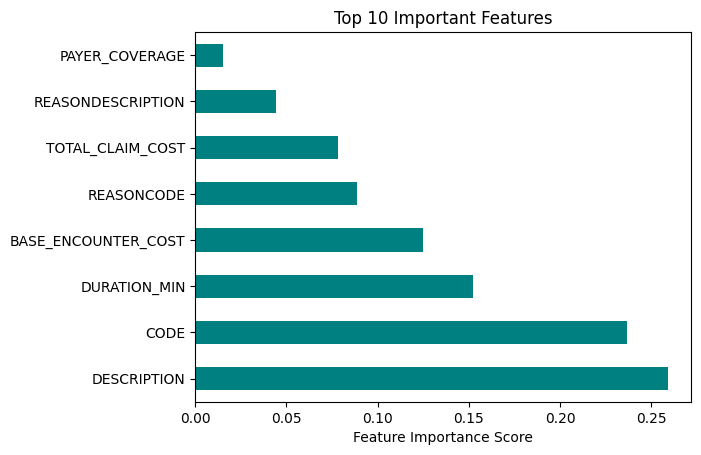

In [49]:
feat_imp = pd.Series(clf.feature_importances_, index = X.columns)
feat_imp.nlargest(10).plot(kind = "barh", color = "teal")
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.show()